In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
dataset = pd.read_csv('wine.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [3]:
dataset['quality'] = dataset['quality'].map({'bad' : 0, 'good' : 1})
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [4]:
# Separating features and targets
X = dataset.drop('quality', axis = 1)
y = dataset['quality']

In [5]:
# Standardizing the data (although not necessary for rule based algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Splitting into train test datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 8)

In [7]:
# Build and fit the model on the data
model = GradientBoostingClassifier(n_estimators = 150, learning_rate = 0.1, max_depth = 8)
model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=8, n_estimators=150)

In [8]:
# Predicting on our test set
predictions = model.predict(X_test)

Accuracy:  0.8166666666666667

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       232
           1       0.83      0.82      0.82       248

    accuracy                           0.82       480
   macro avg       0.82      0.82      0.82       480
weighted avg       0.82      0.82      0.82       480


Confusion Matrix
[[189  43]
 [ 45 203]]



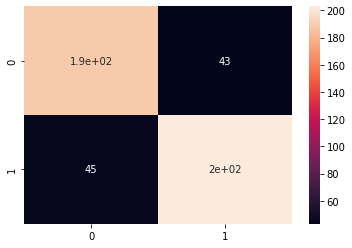

In [9]:
# Checking classification metrics of the model
print('Accuracy: ', accuracy_score(y_test, predictions))
print()
print('Classification Report')
print(classification_report(y_test, predictions))
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))
print()
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)